### OpenCV + sdd mobilenet v3 (coco) for Object Detection ###

In [1]:
# Ref: 
# tensorflow ref:https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md
# config ref: https://gist.github.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7

In [2]:
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [4]:
folder_path = 'config/'

In [5]:
# Get sdd Mobilnetv3 Net Architecture Weights and Configuration:
net_weights_path = folder_path + 'frozen_inference_graph.pb'
net_config_path = folder_path + 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [6]:
# Get coco class labels:
coco_labels = open('config/coco.names').read().strip().split('\n')
print(coco_labels)
print(len(coco_labels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [7]:
# Generate random colors for bboxes:
np.random.seed(0)
colors = np.random.randint(0, 255, size=(len(coco_labels), 3), dtype='uint8')

In [8]:
# Config Net:
net = cv2.dnn_DetectionModel(net_weights_path, net_config_path)
net.setInputSize(320, 320)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 0000025240184C70>

In [9]:
def draw_bboxes_ssdMobilenet(frame, classIds, confs, bbox, colors, labels, desired_objs):
    
    for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
            
            if (coco_labels[classId-1]) in desired_objs:
                
                (x, y) = (box[0], box[1])
                (w, h) = (box[2], box[3])
    
                # get obj class color:
                color = [int(c) for c in colors[classId-1]]
                text = "{}: {:.4f}".format(labels[classId-1], confidence)
                
                # add litle background to class name info:
                backg = np.full((frame.shape), (0,0,0), dtype=np.uint8)
                cv2.putText(backg, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
                fx,fy,fw,fh = cv2.boundingRect(backg[:,:,2])
                
                # Draw obj bbox:
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2) 
                cv2.rectangle(frame, (fx, fy), (fx + fw, fy + fh), color, -1) 
                cv2.rectangle(frame, (fx, fy), (fx + fw, fy + fh), color, 3) 
                cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)
    
    pass

In [10]:
# Load Video:
cap = cv2.VideoCapture('street_sample_video.mp4')
video_fps = cap.get(cv2.CAP_PROP_FPS)

# Desired Objects for Detection:
desired_objs = ['car', 'person']

while True:
    
    start = time.time()
    
    success, frame = cap.read()
    
    if not success:
        break
        
    frame = cv2.resize(frame, (600,500))
    
    #########################################################################################################################
    
    # Detections:
    classIds, confs, bbox = net.detect(frame, confThreshold=0.5)
    
    if (len(classIds) > 0):
        
        draw_bboxes_ssdMobilenet(frame, classIds, confs, bbox, colors, coco_labels, desired_objs)
                
    #########################################################################################################################
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
    
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
        
    if (fps > video_fps):
        time.sleep(1/video_fps)
        fps = video_fps
            
    cv2.putText(frame, "FPS: {}".format(fps), (30,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    cv2.imshow("Output", frame)
    
cv2.destroyAllWindows()
cap.release()

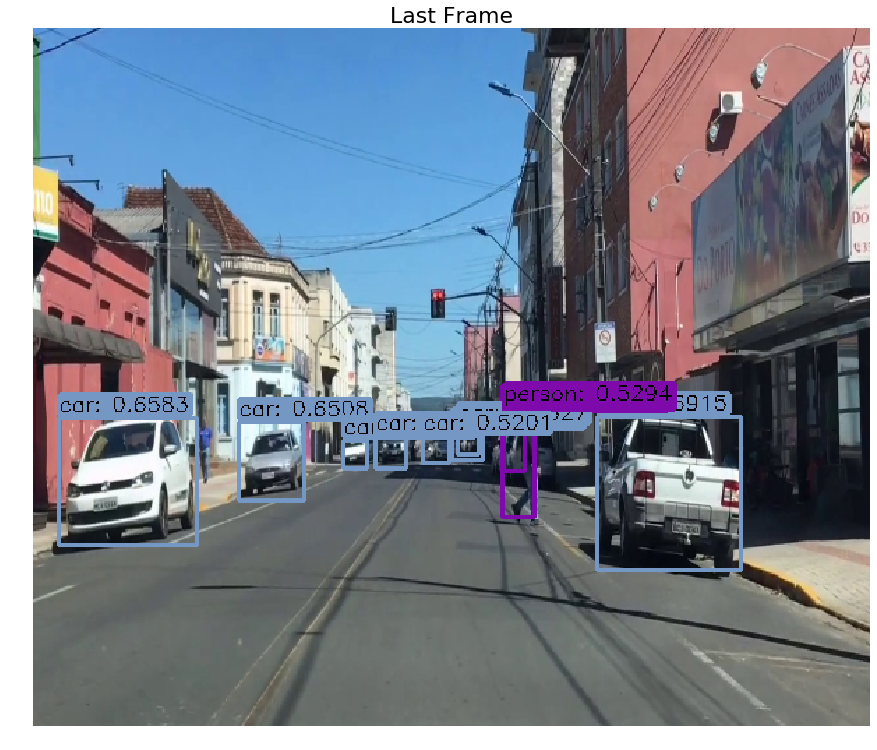

In [11]:
OpCV_Utils.show_single_image_plt(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size =(15,15))